# Гипергеометрическое распределение

### Основные характеристики

$\xi \sim HG (N, M, n), $ где $N$ - общее число элементов, $M$ - общее число элементов с нужным свойством, $n$ - размер выборки из общего числа элементов $ (n \leq M \leq N) $

$P (\xi = k) = \frac{C_M^k C_{N-M}^{n-k}}{C_N^n}, k=0, ..., n $

$ E[\xi] = \sum_{k=0}^{n}k\frac{C_M^k C_{N-M}^{n-k}}{C_N^n} = \sum_{k=1}^{n}k\frac{M!C_{N-M}^{n-k}}{(M-k)!k!C_N^n} =  \sum_{k=0}^{n-1}(k+1)\frac{M!C_{N-M}^{n-k-1}}{(M-k-1)!(k+1)!C_N^n} = \sum_{k=0}^{n-1}\frac{M!C_{N-M}^{n-1-k}}{(M-1-k)!k!C_N^n} = M \sum_{k=0}^{n-1}\frac{C_{M-1}^k C_{N-M}^{n-1-k}}{C_N^n}  = $
$= \frac{M n}{N}\sum_{k=0}^{n-1}\frac{C_{M-1}^k C_{N-1-M+1}^{n-1-k}}{C_{N-1}^{n-1}} = \frac{M n}{N}$

Стоит пояснить, что $\sum_{k=0}^{n-1}\frac{C_{M-1}^k C_{N-1-M+1}^{n-1-k}}{C_{N-1}^{n-1}} = \sum_{k=0}^{n-1}P(\eta=k)=1,$ где $\eta \sim HG (N-1, M-1, n-1)$ 


$ E[\xi^2] = \sum_{k=0}^{n}k^2\frac{C_M^k C_{N-M}^{n-k}}{C_N^n} = \sum_{k=1}^{n}k^2\frac{M!C_{N-M}^{n-k}}{(M-k)!k!C_N^n} =  \sum_{k=0}^{n-1}(k+1)^2\frac{M!C_{N-M}^{n-k-1}}{(M-k-1)!(k+1)!C_N^n} = \sum_{k=0}^{n-1}(k+1)\frac{M!C_{N-M}^{n-1-k}}{(M-1-k)!k!C_N^n} = $
$ = M \sum_{k=0}^{n-1}(k+1)\frac{C_{M-1}^k C_{N-M}^{n-1-k}}{C_N^n}  = \frac{M n}{N}\sum_{k=0}^{n-1}(k+1)\frac{C_{M-1}^k C_{N-1-M+1}^{n-1-k}}{C_{N-1}^{n-1}} = \frac{M n}{N} E[\eta + 1] = \frac{M n}{N} (\frac{(M-1)(n-1)}{(N-1)} + 1),$

где $\eta \sim HG (N-1, M-1, n-1)$

$D[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{M n}{N} (\frac{(M-1)(n-1)}{(N-1)} + 1 - \frac{M n}{N})$

Производящая функиця $g_\xi(z) = E[z^\xi] = \sum_{k=0}^{n}z^k\frac{C_M^k C_{N-M}^{n-k}}{C_N^n} $

Характеристическая функция $\phi_\xi(t) = E[e^{it\xi}] = \sum_{k=0}^{n}e^{itk}\frac{C_M^k C_{N-M}^{n-k}}{C_N^n} $

### Зададим гипергеометрическое распределение $HG(200, 70, 10)$ используя модуль Scipy [1]

In [14]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N, M, n = (200, 70, 10)
hg = hypergeom(N, n, M)

### Построение эмпирических функций распределения

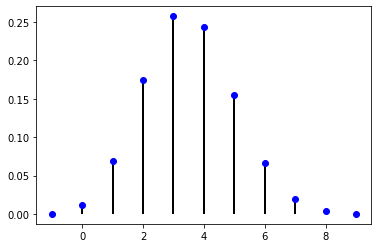

In [18]:
x = np.arange(-1, n)
pmf = hg.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf, 'bo')
ax.vlines(x, 0, pmf, lw=2)
plt.show()

#### Функция распределения

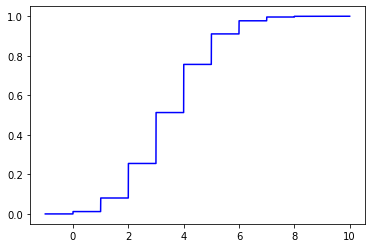

In [25]:
x = np.arange(-1, n, 0.001)
cdf = hg.cdf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, cdf, 'b')
plt.show()

### Классической моделью применения является оценка численности замкнутой популяции животных.

    Проблема состоит, например, в определении численности N рыб, живущих на момент наблюдения в замкнутом водоеме, скажем, в пруду рыбоводного хозяйства [2]. Для определения (точнее, приближенной оценки) N исследователь отлавливает заданное количество M рыб, метит их каким-либо способом и возвращает в пруд. По истечении некоторого промежутка времени, когда, по его мнению, меченые рыбы “перемешались” с другими обитателями пруда, он снова отлавливает фиксированное количество n рыб (в математической статистике эта процедура называется извлечением выборки объема n из генеральной совокупности) и подсчитывает число m отмеченных рыб, попавших во второй улов. В рамках гипергеометрической модели такого эксперимента мы располагаем значениями параметров M и n, знаем результат m наблюдения случайной величины X, но не знаем значения параметра N гипергеометрического распределения P(X = k | N, M, n).

    Один из основных методов решения обратных задач теории вероятностей (задач математической статистики), который называется методом максимального правдоподобия, состоит в выборе такого значения Nˆ параметра N, которое соответствует максимуму вероятности наблюдаемого исхода m в наблюдении X. Основной довод в пользу такого поведения статистика состоит в простом житейском наблюдении: если происходит какоелибо событие, то это событие должно иметь большую вероятность по сравнению с другими исходами статистического эксперимента.

    Итак, метод максимального правдоподобия предлагает в качестве оценки неизвестного значения N (численности рыб в пруду) взять решения следующей задачи на экстремум:

<center>$\hat{N} = arg \underset{N}\max{\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}}  $</center>

    Решить эту задачу можно с помощью определения значения N, при котором происходит смена неравенства
<center>$\hat{N} = \frac{C_M^k C_{N-M}^{n-k}}{C_N^n} < \frac{C_M^k C_{N+1-M}^{n-k}}{C_{N+1}^n}  $</center>
    
    на обратное. Используя известную формулу для вычисления биномиальных коэффициентов, находим, что это неравенство эквивалентно (N + 1)k > nM, откуда получаем оценку максимального правдоподобия для численности рыб в пруду:

<center>$\hat{N} = k   \lfloor \frac{n}{M} \rfloor $</center>

### Моделирование гипергеометрического распределения

Вариантом моделирования случайно величины $\xi$ с известной функцией распределения $F_\xi(x)$ является метод обратных функций.[3]

Заметим, что $F_\xi: \mathbb{R} \rightarrow [0,1]$

Пусть $\eta \sim R[0,1]$ - случайная величина, которую мы умеем моделировать, а $F_\eta (x) = x$ - её функция распределения.

Тогда $ F_{F_\xi^{-1}(\eta)}(x) = P(F_\xi^{-1}(\eta)<x) = P(\eta<F_\xi(x)) = F_\eta(F_\xi(x)) = F_\xi(x)$

Иными словами, если у нас есть $X_1, ..., X_n$ - выборка из стандартного равномерного распределения $R[0,1]$, то 

$F_\xi^{-1} (X_1), ..., F_\xi^{-1} (X_n) $ - выборка из моделируемого распределения случайно величины $\xi$.

Стоит заметить, что утверждение выше наклдывает ограничение на функцию $F_\xi(x)$, которая должна быть биективной (иными словами строговозрастающей). Функция распределения гипергеометрического распределения является неубывающей, но никак не строговозрастающей. Для того, чтобы решить этот вопрос будет брать точную нижнюю границу полного праоброза известной нам функции распределения, то есть $inf\{x| F_\xi(x) = X_1\}, ... ,inf\{x| F_\xi(x) = X_n\}$- выборка моделируемого распределения случайно величины $\xi$ свободной от ограничений на функцию распределения. 

# Гамма распределение

### Основные характеристики

$\xi \sim \Gamma(\alpha, \theta), $

$f(x) = \frac{x^{\alpha-1}\theta^\alpha e^{-x\theta}}{\Gamma(\alpha)}, x \geq 0$

$ E[\xi] = \int_{-\infty }^{+\infty}x f(x)dx = \int_{0}^{+\infty}x \frac{x^{\alpha-1}\theta^\alpha e^{-x\theta}}{\Gamma(\alpha)} dx= \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty} x^{\alpha}e^{-x\theta} dx = \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty}  \big(\frac{z}{\theta} \big)^\alpha e^{-z} \frac{dz}{\theta} = \frac{1}{\theta\ \Gamma(\alpha)}\int_{0}^{+\infty}z^\alpha e^{-z}dz=\frac{\Gamma(\alpha+1)}{\theta\ \Gamma(\alpha)}=\frac{\alpha}{\theta}$

$ E[\xi^2] = \int_{-\infty }^{+\infty}x^2 f(x)dx = \int_{0}^{+\infty}x^2 \frac{x^{\alpha-1}\theta^\alpha e^{-x\theta}}{\Gamma(\alpha)} dx= \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty} x^{\alpha+1}e^{-x\theta} dx = \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty}  \big(\frac{z}{\theta} \big)^\alpha+1 e^{-z} \frac{dz}{\theta} = \frac{1}{\theta^2\ \Gamma(\alpha)}\int_{0}^{+\infty}z^\alpha+1 e^{-z}dz=\frac{\Gamma(\alpha+2)}{\theta^2\ \Gamma(\alpha)}=\frac{\alpha(\alpha+1)}{\theta^2}$

$D[\xi] = E[\xi^2] - (E[\xi])^2 = \frac{\alpha}{\theta^2}$

Характеристическая функция $\phi_\xi(t) = E[e^{it\xi}] =  \int_{0}^{+\infty} e^{itx} \frac{x^{\alpha-1}\theta^\alpha e^{-x\theta}}{\Gamma(\alpha)} dx= \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty} e^{(it-\theta) x} x^{\alpha-1} dx= \frac{\theta^\alpha}{\Gamma(\alpha)} \int_{0}^{+\infty} e^{z} (\frac{z}{it-\theta})^{\alpha-1} \frac{dz}{it-\theta}= \frac{\theta^\alpha (it-\theta)^{-\alpha} \Gamma(\alpha)}{\Gamma(\alpha)} = \theta^\alpha (it-\theta)^{-\alpha} $

### Известные соотношения:

Если $\xi_1, ... , \xi_n $ - независимые экспоненциальные случайные величины, такие что  $ \xi_i \sim Exp(\theta) \space\forall i=1,..,n$,то $ \sum_{i=1}^n \xi_i \sim \Gamma(n, \theta)$

Если $ \xi \sim \Gamma(\alpha, \theta)$, то $c \xi  \sim \Gamma(\alpha, c\theta)  \space\forall c>0$

$\Gamma(n/2, 1/2) \equiv \chi^2 (n), n \in \mathbb{N} $


### Применения гамма-распределения

 Классическим методом применения гамма-распределения является моделирование других случайных величин.

Помимо этого гамма-распледелением описывает уязвимость живого оргазима к кумлятивному риску смерти. [4]

Гамма-распределению могут быть подчинены такие величины, как общий срок службы изделия, время наработки до k-го отказа.
Также, это распределение используется в логистике для описания спроса в моделях управления запасами [5].

### Выведем плотность гамма распределения $\Gamma(2, 1/2)$, задав эти функции вручную

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as sps
%matplotlib inline
a, th = (2, 1/2)
def f_gamma(x):
    return np.exp(-x*th) * th**a * x**(a-1) / (sps.gamma(a))

def F_gamma(x):
    return [(integrate.quad(f_gamma, 0, a)[0] if a>0 else 0) for a in x]

#### Плотность распределения

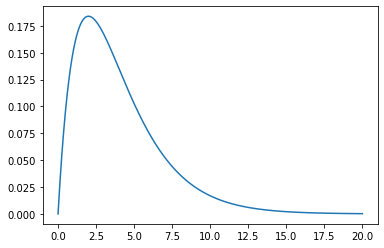

In [66]:
x = np.arange(0, 20, 0.001)
y = f_gamma(x)
plt.plot(x, y)
plt.show()

#### Функция распределения

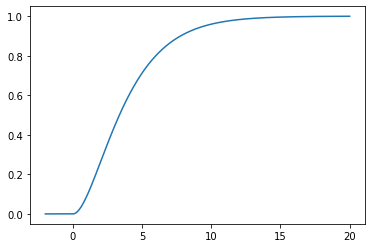

In [87]:
x = np.arange(-2, 20, 0.001)
y = F_gamma(x)
plt.plot(x, y)
plt.show()

### Моделирование гамма-распределения

Задача: получить гамма-распределение с параметрами $\alpha, \theta$, предпологая, что есть возможность моделирования стандартного равномерного распределения $R(0,1]$. Пусть $\chi \sim R(0,1]$.

Будем считать, что $\alpha=n+\delta$, где $n \in \mathbb{N}, \delta \in (0,1)$

Заметим, что $\Gamma(1, 1) = Exp(1)$. Тогда $-ln \space \chi \sim \Gamma(1, 1)$.
По свойству гамма-распределения $\Gamma(n, 1)=\sum_{i=1}^{n} \Gamma(1, 1)$, то есть 

$-\sum_{i=1}^{n}ln \space \chi_i \sim \Gamma(1, 1) \space \forall n \in \mathbb{N}$, где $\chi_i \sim R(0,1]$ - независимые случайные величины

Получим сначала распределение $\Gamma(\delta, 1)$, где $\delta \in (0, 1)$. Воспользуемся алгоритмом [6], основанном на выборке с отклонением. Пусть $v_0 = \frac{e}{e+\delta}$.
1. Положим m=1.
2. Сгенерируем $V_{2m-1}$ и $V_{2m}$ - независимые случайные величины, равномерно распределённые на интервале $(0, 1]$.
3. Если $V_{2m-1} < v_0$, то положим $\xi_m=(\frac{V_{2m-1}}{v_0})^{1/\delta},  \eta_m=V_{2m} \xi_m^{\delta -1 }$, иначе $\xi_m=1-ln\frac{V_{2m-1}-v_0}{1-v_0},  \eta_m=V_{2m} e^{-\xi_m}$
4. Если $ \eta_m >  \xi_m^{\delta -1 } e^{-\xi_m}$, то учевличим $m$ на $1$ и вернёмся к шагу 2, иначе $\xi=\xi_m$ примем за реализацию $\Gamma(\delta, 1)$

Итак, теперь имеем $\xi-\sum_{i=1}^{n}ln \space \chi_i \sim \Gamma(\alpha, 1)$

Тогда по свойству гамма-распеделения $\theta(\xi-\sum_{i=1}^{n}ln \space \chi_i) \sim \Gamma(\alpha, \theta)$

[1] https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html <br>
[2] https://kpfu.ru/docs/F1021260618/TViMS.pdf <br>
[3] Вадзинский Р.Н. Справочник по вероятностным распределениям. - СПб.: Наука, 2001, 295 с. <br>
[4] https://books.google.ru/books?id=c210AgAAQBAJ&pg=PA196&lpg=PA196&dq=%D0%BF%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%86%D0%B8%D1%8F+%D0%B3%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5&source=bl&ots=lCtxofnVqZ&sig=ACfU3U3lFh_rRICVHSUSt2aFNVvS0jrf-Q&hl=ru&sa=X&ved=2ahUKEwj-oeamq6vlAhVjwqYKHVarBAwQ6AEwBnoECAkQAQ#v=onepage&q=%D0%BF%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%86%D0%B8%D1%8F%20%D0%B3%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5&f=false <br>
[5] https://core.ac.uk/download/pdf/6243682.pdf <br>
[6] https://cyberleninka.ru/article/v/generirovanie-rekordov-metodom-vyborki-s-otkloneniem <br>